In [21]:
### 1.4.3 Python語言類別變數編碼
## ------------------------------------------------------------------------
import pandas as pd
# 以原生資料結構巢狀串列建構pandas 資料框
df = pd.DataFrame([['green', 'M', 10.1, 'class1'], ['red',
'L', 13.5, 'class2'], ['blue', 'XL', 15.3, 'class1']])
# 設定資料框欄位名稱
df.columns = ['color', 'size', 'price', 'classlabel']
print(df)

## ------------------------------------------------------------------------
# 定義編碼規則字典
size_mapping = {'XL': 3, 'L': 2, 'M': 1}
# 序列map() 方法完成編碼，並更新size 變數
df['size'] = df['size'].map(size_mapping)
print(df)

## ------------------------------------------------------------------------
# 載入類別
from sklearn.preprocessing import LabelEncoder
# 創建(或稱實作) 類別物件class_le
class_le = LabelEncoder()
# 傳入類別變數進行配適與轉換
y = class_le.fit_transform(df['classlabel'])
# 標籤編碼完成(對應整數值預設從0 開始)
print(y)
# y = LabelEncoder().fit_transform(df['classlabel'])
## ------------------------------------------------------------------------
# 逆轉換回原類別值
print(class_le.inverse_transform(y.reshape(-1, 1)))
# 注意下面兩個資料物件內涵相同，但維度不同！前一維，後二維
print(y)
print(y.reshape(-1, 1))

## ------------------------------------------------------------------------
# 取出欲編碼欄位，轉成ndarray(欄位名稱會遺失)
X = df[['color', 'size', 'price']].values
print(X)
# 先進行color 欄位標籤編碼，因為單熱編碼不能有object！(sklearn 0.22.2 以前舊版本的限制，0.22.2 以後(含)新版本無須先進行標籤編碼！)
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
# color 標籤編碼已完成
print(X)


   color size  price classlabel
0  green    M   10.1     class1
1    red    L   13.5     class2
2   blue   XL   15.3     class1
   color  size  price classlabel
0  green     1   10.1     class1
1    red     2   13.5     class2
2   blue     3   15.3     class1
[0 1 0]
['class1' 'class2' 'class1']
[0 1 0]
[[0]
 [1]
 [0]]
[['green' 1 10.1]
 ['red' 2 13.5]
 ['blue' 3 15.3]]
[[1 1 10.1]
 [2 2 13.5]
 [0 3 15.3]]


d:\anaconda3\envs\bigdata\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
import numpy as np
## ------------------------------------------------------------------------
# 載入單熱編碼類別
from sklearn.preprocessing import OneHotEncoder
# 宣告類別物件ohe
#* ohe = OneHotEncoder(categorical_features=[0]) #  sklearn 0.22.2 以前的用法！
ohe = OneHotEncoder()
# 照預設編碼完後轉為常規矩陣
#* print(ohe.fit_transform(X).toarray())
print(ohe.fit_transform(df.iloc[:,[0,3]]).toarray()) # 單獨挑選待編碼欄位
print(np.hstack((ohe.fit_transform(df.iloc[:,[0,3]]).toarray(), df.iloc[:,1:3].values))) # 須將兩numpy ndarray用值組 tuple 組織起來
# 或者可設定sparse 引數為False 傳回常規矩陣
# ohe=OneHotEncoder(categorical_features=[0], sparse=False)
# print(ohe.fit_transform(X))

[[0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0.]]
[[ 0.   1.   0.   1.   0.   1.  10.1]
 [ 0.   0.   1.   0.   1.   2.  13.5]
 [ 1.   0.   0.   1.   0.   3.  15.3]]


In [23]:
class LinearRegressionGD(object):
    # 定義物件初始化方法，物件初始化時帶有兩個屬性
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta  # 設定學習速率(eta)
        self.n_iter = n_iter  # 設定迭代次數(n_iter)

    # 定義物件的方法fit()，此方法會根據傳入的X 與y 計算屬性
    # w_ 和cost_
    def fit(self, X, y):
        # 隨機初始化屬性w_
        self.w_ = np.random.randn(1 + X.shape[1])  # 初始化權重(w_)，其中包含了截距(intercept)
        # 損失函數屬性cost_
        self.cost_ = []  # 初始化成本(cost_)列表
        # 根據物件屬性eta 與n_iter，以及傳入的X 與y 計算屬性
        # w_ 和cost_
        for i in range(self.n_iter):  # 進行n_iter次迭代
            output = self.lin_comb(X)  # 計算線性組合結果(output)
            errors = (y - output)  # 計算誤差(errors)
            self.w_[1:] += self.eta * X.T.dot(errors)  # 更新權重(w_)，其中包含了特徵權重
            self.w_[0] += self.eta * errors.sum()  # 更新截距(intercept)
            cost = (errors**2).sum() / 2.0  # 計算成本(cost)，使用均方誤差函數
            self.cost_.append(cost)  # 將成本(cost)加入成本列表(cost_)
        return self  # 返回物件本身

    # 定義fit 方法會用到的lin_comb 線性組合方法
    def lin_comb(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]  # 計算線性組合結果

    # 定義物件的方法predict()
    def predict(self, X):
        return self.lin_comb(X)  # 返回線性組合結果


In [24]:
# 此行敘述是Python 單列for 迴圈寫法，請參考1.8.2 節Python
# 語言資料匯入及匯出的串列推導(list comprehension)
print([name for name in dir() if name in
["LinearRegressionGD"]])
# 模擬五十筆預測變數，使用numpy 常用函數linspace()


['LinearRegressionGD']


In [25]:
X = np.linspace(0, 5, 50) # linspace(start, stop, num)
print(X[:4]) # 前四筆模擬的預測變數


[0.         0.10204082 0.20408163 0.30612245]


In [26]:
# 模擬五十筆反應變數，利用numpy.random 模組從標準常態分佈產生
# 隨機亂數
y = 7.7 * X + 55 + np.random.randn(50)
print(y[:4])

[55.06448028 55.10379372 56.36694544 57.57635171]


In [27]:
dir()

['In',
 'LabelEncoder',
 'LinearRegressionGD',
 'OneHotEncoder',
 'Out',
 'X',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'class_le',
 'color_le',
 'df',
 'exit',
 'get_ipython',
 'np',
 'ohe',
 'open',
 'pd',
 'quit',
 'size_mapping',
 'y']

In [28]:
# 實作LinearRegressionGD 類物件lr
lr = LinearRegressionGD(n_iter=350)
# 創建後配適前有eta, n_iter, fit(), lin_comb() 與predict()
# print(dir(lr))

In [29]:
for tmp in ["w_", "cost_"]:
    print(tmp in dir(lr))

False
False


In [30]:
# 確認預設迭代次數已變更為350
print(lr.n_iter)


350


In [32]:
# 傳入單行二維矩陣X 與一維向量y，以梯度陡降法計算係數
lr.fit(X.reshape(-1,1), y)
# 配適完畢後新增加w_ 與cost_ 屬性
for tmp in ["w_", "cost_"]:
    print(tmp in dir(lr))


True
True


In [34]:
# 截距與斜率係數
print(lr.w_)


[54.02466357  7.96585263]


In [35]:
# 最後三代的損失函數值，隨著代數增加而降低
print(lr.cost_[-3:])


[22.530364611859532, 22.440612603341382, 22.35296756237815]


In [37]:
# 預測X_new 的y 值
X_new = np.array([2])
print(lr.predict(X_new))

69.95636882939417


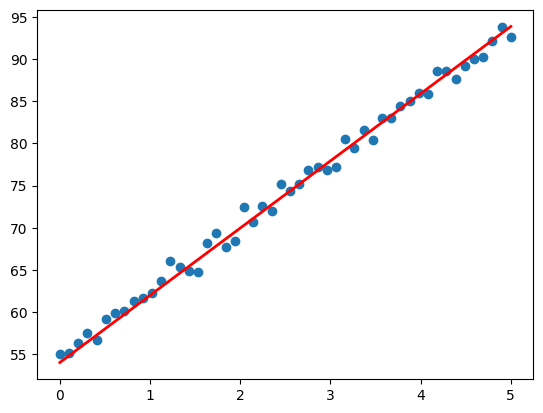

In [38]:
# X 與y 散佈圖及LinearRegressionGD 配適的線性迴歸直線
# Python 繪圖語法參見4.1 節資料視覺化
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)
ax.plot(X, lr.predict(X.reshape(-1,1)), color='red',
linewidth=2)

In [46]:
### 1.8.2 Python語言資料匯入及匯出
## ------------------------------------------------------------------------
data_dir = "../data/"
# Python 空字串的join() 方法，類似R 語言的paste0() 函數
fname = ''.join([data_dir, "letterdata.csv"])


In [47]:
## ------------------------------------------------------------------------
# mode 引數預設為'r' 讀取模式
f = open(fname)
# 有read() 方法
print(dir(f)[49:54])

['readable', 'readline', 'readlines', 'reconfigure', 'seek']


In [48]:
data = f.read()
# 記得關閉檔案連結
f.close()
# data 為str 類型物件
print(type(data))

<class 'str'>


In [50]:
# 類別為str 的data 有712669 個字符
print(len(data))

712669


In [51]:
# split() 方法依換行符號"\n" 將data 切成多個樣本的lines
lines = data.split("\n")

In [52]:
# lines 類型為串列
print(type(lines))

<class 'list'>


In [53]:
# 檢視第一列發現：一橫列一元素，元素內逗號分隔開各欄位名稱
# Python 串列取值冒號運算子，前包後不包
print(lines[0][:35])

letter,xbox,ybox,width,height,onpix


In [54]:
# 再次以split() 方法依逗號切出首列中的各欄名稱
header = lines[0].split(',')
print(header[:6])

['letter', 'xbox', 'ybox', 'width', 'height', 'onpix']


In [55]:
## ------------------------------------------------------------------------
# 20002 筆
print(len(lines))

20002


In [56]:
# 注意最末空字串
print(lines[20000:])

['A,4,9,6,6,2,9,5,3,1,8,1,8,2,7,2,8', '']


In [57]:
# 排除首列欄位名稱與末列空字串
lines = lines[1:20001]

In [58]:
# 第一筆觀測值
print(lines[:1])

['T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8']


In [59]:
# 共兩萬筆觀測值
print(len(lines))

20000


In [60]:
import numpy as np
# 宣告numpy 二維字符矩陣(20000, 17)
data = np.chararray((len(lines), len(header)))

In [61]:
print(data.shape)
# 以enumerate() 同時抓取觀測值編號與觀測值
for i, line in enumerate(lines):
    # 串列推導list comprehension，併入data 的第i 列
    data[i, :] = [x for x in line.split(',')]


(20000, 17)


In [62]:

## ------------------------------------------------------------------------
# 列印變數名稱
# print(header)
# 列印各觀測值
print(data)

[[b'T' b'2' b'8' ... b'8' b'0' b'8']
 [b'I' b'5' b'1' ... b'8' b'4' b'1']
 [b'D' b'4' b'1' ... b'7' b'3' b'9']
 ...
 [b'T' b'6' b'9' ... b'1' b'2' b'4']
 [b'S' b'2' b'3' ... b'9' b'5' b'8']
 [b'A' b'4' b'9' ... b'7' b'2' b'8']]
